In [1]:
from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from create_model import load_model_no_train


In [5]:
device = "cuda:3"
#checkpoint = "linear12903_50"
#checkpoint = "linear77575_fxj5a68i_390"
#checkpoint = "linear69376_okcpk2bv_170"
checkpoint = "linear26134_390"
model = TabPFNClassifier(device=device, no_preprocess_mode=True)
#model = GradientBoostingClassifier()
config = model.c
config["num_features"] = 100
model_pytorch = load_model_no_train("tabpfn/model_checkpoints", f"model_{checkpoint}.pt", 0, config, 0)[0]
model.max_num_features = 100
model.model = model_pytorch

Using style prior: True
{'recompute_attn': True}
Using cuda:3 device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7f93ed329dc0>, 'seq_len_maximum': 10, 'device': 'cuda:3', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'normalize_to_ranking': False, 'set_value_to_nan': 0.1, 'normalize_by_used_features': True, 'num_features_used': <functio

In [7]:
import pandas as pd
# import train_test_split
from sklearn.model_selection import train_test_split

df = pd.read_csv("tabpfn/prostate.csv")

In [8]:
X, y = df.drop(columns=["y"]), df["y"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train = X_train[X_train.columns[:5000]]
X_test = X_test[X_test.columns[:5000]]

In [15]:
model.fit(X_train, y_train)

TabPFNClassifier(device='cuda:3')

In [16]:
# compute accuracy
model.score(X_test, y_test)

interface
torch.Size([102, 1, 5000])
torch.Size([102, 1])
81


0.42857142857142855

In [17]:
model.predict(X_test)

interface
torch.Size([102, 1, 5000])
torch.Size([102, 1])
81


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [19]:
model.predict_proba(X_test)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6033 and the array at index 1 has size 10000

In [3]:
# Synthetic high dimensional data
import numpy as np
X = np.random.rand(100, 100)
number_of_relevant_features = 5
relevant_features = np.random.choice(100, number_of_relevant_features, replace=False)
W = np.random.rand(number_of_relevant_features, 1)
y = np.dot(X[:, relevant_features], W)
y = (y > np.median(y)).astype(int).flatten()


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
model.predict(X_test)

interface
torch.Size([100, 1, 100])
torch.Size([100, 1])
80


array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [89]:
model.score(X_test, y_test)

interface
torch.Size([100, 1, 100])
torch.Size([100, 1])
80


0.75

In [88]:
y_test

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [41]:
#from tabpfn.priors.flexible_categorical import get_batch
from tabpfn.priors.linear import get_batch as get_batch_linear
from tabpfn.priors.flexible_categorical import MulticlassRank, BalancedBinarize

def get_batch_func():
    hyperparameters = {"random_feature_removal": 0.99, "random_feature_removal_min":0.95,
                    "correlation_strength_min": 0, "correlation_strength_max": 0,
                    "correlation_proba_min": 0, "correlation_proba_max": 0,
                    "p_categorical": 0,
                    "sampling": "normal",
                    "output_multiclass_ordered_p": 0.0,
                    "curriculum": False,
                    "seq_len_used": 50,
                    "num_features_used": 100,
                    "num_classes": 10,
                    "balanced": False,
                      'aggregate_k_gradients': 8,
  'recompute_attn': True,
  'bptt_extra_samples': None,
  'bptt': 1152,
  'dynamic_batch_size': False,
  'multiclass_loss_type': 'nono',
  'output_multiclass_ordered_p': 0.0,
  'normalize_with_sqrt': False,
  'new_mlp_per_example': True,
  'prior_mlp_scale_weights_sqrt': True,
  'batch_size_per_gp_sample': None,
  'normalize_ignore_label_too': False,
  'differentiable_hps_as_style': False,
  'random_feature_rotation': True,
  'rotate_normalized_labels': True,
  'normalize_on_train_only': True,
  'mix_activations': False,
  'weight_decay': 0.0,
  'use_flash_attention': True,
  'canonical_y_encoder': False,
  'total_available_time_in_s': None,
  'train_mixed_precision': True,
  'efficient_eval_masking': True,
  'hardware_batch_size': 4,
  'num_global_att_tokens': 0,
  'use_seperate_decoder': False,
  'attend_to_global_tokens_only_at_test': False,
  "max_eval_pos": 1000,
  'lr': 0.0001,
  'dropout': 0.0,
  'emsize': 512,
  'batch_size': 64,
  'nlayers': 12,
  'num_features': 100,
  'nhead': 4,
  'nhid_factor': 2,
  'eval_positions': None,
  'sampling': 'mixed',
  'epochs': 400,
  'num_steps': 128,
  'verbose': False,
  'pre_sample_causes': True,
  'multiclass_type': 'rank',
  'nan_prob_unknown_reason_reason_prior': 1.0,
  'categorical_feature_p': 0.0, #TODO
  'nan_prob_no_reason': 0.0,
  'nan_prob_unknown_reason': 0.0,
  'nan_prob_a_reason': 0.0,
  'max_num_classes': 10,
  'num_classes': 10,
  'noise_type': 'Gaussian',
  'balanced': False,
  'normalize_to_ranking': False,
  'set_value_to_nan': 0.1,
  'normalize_by_used_features': True,
  #'num_features_used': {'num_features_func': None},
  'num_categorical_features_sampler_a': -1.0,
    }
    hyperparameters['sampling'] = "mixed"
    args = {}
    args["remove_outliers_in_flexible_categorical"] = False
    args["normalize_x_in_flexible_categorical"] = False
    args["random_feature_rotation"] = False
    args["assign_class_in_flexible_categorical"] = True
    hyperparameters['normalize_labels'] = True
    hyperparameters['check_is_compatible'] = True
                    
    X, y, _ = get_batch_linear(batch_size=1,
            #get_batch=get_batch_linear,
            #device=device,
            seq_len=1152,
            num_features=40,
            #single_eval_pos=600,
            hyperparameters=hyperparameters,
            **args)
    
    # # standardize y
    # y = (y - torch.mean(y)) / torch.std(y)

    class_assigner = MulticlassRank(num_classes=10, ordered_p=hyperparameters["output_multiclass_ordered_p"])
    # #class_assigner = BalancedBinarize()
    y = class_assigner(y)
    # #print(np.unique(y, return_counts=True))
    # # normalize y
    # for b in range(y.shape[1]):
    #     valid_labels = y[:,b] != -100
    #     # if self.h.get('normalize_ignore_label_too', False):
    #     #         valid_labels[:] = True
    #     y[valid_labels, b] = (y[valid_labels, b] > y[valid_labels, b].unique().unsqueeze(1)).sum(axis=0).unsqueeze(0)
    X = X.reshape(X.shape[0], X.shape[2])
    y = y.reshape(y.shape[0])
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=700, random_state=42)
    return X_train, X_test, y_train, y_test

In [37]:
get_batch_func()

rotating features


(tensor([[ 0.0651, -2.1285,  0.4428,  ..., -0.8395, -0.3146, -1.3967],
         [-0.7723, -0.8021,  0.1258,  ..., -0.3792, -0.1650, -0.0151],
         [ 0.1415, -0.2961,  0.5704,  ..., -0.0239, -0.6295, -0.7734],
         ...,
         [ 0.4680,  0.8811, -1.8998,  ...,  1.3479,  1.6304, -0.0158],
         [-0.0972,  0.2758,  0.1532,  ...,  0.5719,  1.5223,  0.7360],
         [-0.2016, -1.0408, -0.9346,  ..., -0.5251, -1.4770,  0.6323]]),
 tensor([[-0.0397,  0.3720, -0.3215,  ...,  1.6429,  1.2754, -0.5904],
         [-0.1103,  0.3713,  0.3539,  ..., -0.9729, -0.9934,  1.0556],
         [ 1.5721,  1.1113,  0.1794,  ..., -0.8601,  0.8203,  0.5060],
         ...,
         [ 1.4626,  0.5087, -1.8834,  ..., -0.2793,  0.2000,  1.0522],
         [-0.3481, -0.2765, -1.2665,  ...,  0.4647, -1.0108, -0.2413],
         [-0.7488, -0.4481,  1.0984,  ...,  0.7697, -0.2244, -0.8393]]),
 tensor([0, 4, 2, 3, 3, 4, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3,
         4, 3, 4, 3, 3, 2, 3, 3, 3,

In [42]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
clf_lasso = LogisticRegression(random_state=0, penalty="l1", max_iter=1000, solver="liblinear")
clf_l2 = LogisticRegression(random_state=0, max_iter=1000)
gbt = GradientBoostingClassifier()

In [44]:
import torch
n_iter = 8
res_tabpfn = []
res_lasso = []
res_linear = []
res_gbt = []
for _ in range(n_iter):
    X_train, X_test, y_train, y_test = get_batch_func()
    if np.unique(y_train).shape[0] == 1:
        continue
    model.fit(X_train, y_train)
    clf_lasso.fit(X_train, y_train)
    clf_l2.fit(X_train, y_train)
    #gbt.fit(X_train, y_train)
    res_tabpfn.append(balanced_accuracy_score(y_test, model.predict(X_test), adjusted=True))
    res_lasso.append(balanced_accuracy_score(y_test, clf_lasso.predict(X_test), adjusted=True))
    res_linear.append(balanced_accuracy_score(y_test, clf_l2.predict(X_test), adjusted=True))
    #res_gbt.append(balanced_accuracy_score(y_test, gbt.predict(X_test)))

rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700
rotating features
interface
torch.Size([1152, 1, 40])
torch.Size([1152, 1])
700


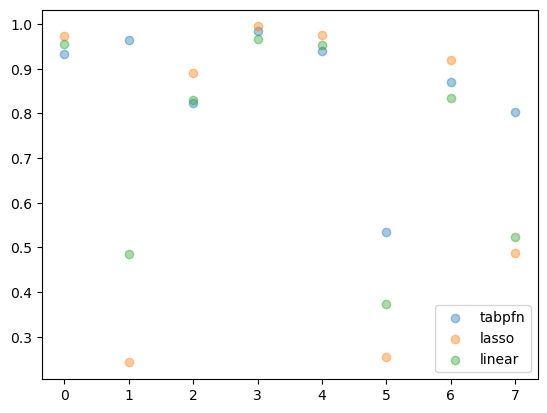

In [45]:
import matplotlib.pyplot as plt
plt.scatter(range(n_iter), res_tabpfn, label="tabpfn", alpha=0.4)
plt.scatter(range(n_iter), res_lasso, label="lasso", alpha=0.4)
plt.scatter(range(n_iter), res_linear, label="linear", alpha=0.4)
#plt.scatter(range(n_iter), res_gbt, label="gbt", alpha=0.4)
plt.legend()

In [26]:
res_lasso

[0.5,
 0.9690321824060579,
 0.9609687901458475,
 0.9559092767379441,
 0.9563293441174943,
 0.966025641025641,
 0.6944444444444444,
 0.9565373756990523,
 0.9498523704295185,
 0.79189772926274,
 0.8239583333333333,
 0.6133312272942664,
 0.5,
 0.9595925297113752,
 0.7727272727272727]

In [16]:
X.shape

torch.Size([1000, 1, 10])

In [17]:
X = X.reshape(X.shape[0], X.shape[2])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
model.fit(X_train, y_train)

/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TabPFNClassifier(device='cuda:3')

In [20]:
model.score(X_test, y_test)

interface
torch.Size([1000, 1, 10])
torch.Size([1000, 1])
800


0.995

In [21]:
model.predict(X_test)

interface
torch.Size([1000, 1, 10])
torch.Size([1000, 1])
800


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [22]:
import torch
import numpy as np
# Baselines
# Predict the most common class
most_common_class = np.bincount(y_train.reshape(-1)).argmax()
print(f"Accuracy: {torch.sum(y_test == most_common_class) / len(y_test)}")

least_common_class = np.bincount(y_train.reshape(-1)).argmin()
print(f"Accuracy: {torch.sum(y_test == least_common_class) / len(y_test)}")


Accuracy: 0.8799999952316284
Accuracy: 0.11999999731779099


In [10]:
# Lasso for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier().fit(X_train, y_train)
clf = LogisticRegression(random_state=0, penalty="l1", solver="saga", max_iter=1000).fit(X_train, y_train)
clf.score(X_test, y_test)

NameError: name 'X_train' is not defined

0.97

In [2]:
import scipy

In [4]:
import time
import numpy as np

In [27]:
start = time.time()
for i in range(10):
    normal = scipy.stats.norm.rvs(loc=0, scale=1, size=(1000, 1, 10000), random_state=None)
print(time.time() - start)

8.077756643295288


In [7]:
start = time.time()
for i in range(1):
    normal = np.random.normal(loc=0, scale=1, size=(1000, 1, 10000))
print(time.time() - start)

0.5950906276702881


In [12]:
from numba import njit

@njit(parallel=True)
def generate_random_values(shape):
    return np.random.normal(0, 1, shape)

# Call the function once to compile it
_ = generate_random_values((1, 1))

# Now you can use the optimized function
random_values = generate_random_values((1000, 10000))

In [28]:
start = time.time()
for i in range(10):
    random_values = generate_random_values((1000, 1, 10000))
print(time.time() - start)

1.1224868297576904


In [30]:
import torch

In [39]:
start = time.time()
torch.normal(mean=torch.zeros(1000, 10, 10000), std=torch.ones(1000, 10, 10000))
print(time.time() - start)

1.2172961235046387


In [ ]:
from tabpfn.priors.trees import get_batch
from tabpfn.priors.flexible_categorical import MulticlassRank, BalancedBinarize, MulticlassValue
import numpy as np

hyperparameters = {"n_estimators_lambda": 0.15, "max_depth_lambda": 0.35,
                   "n_estimators": None,
                   "num_classes": 10,
                   "randomize_leaves": False,
                   "return_classes": False,
                   "correlation_strength_min": 0, "correlation_strength_max": 0,
                   "correlation_proba_min": 0, "correlation_proba_max": 0,
                   "p_categorical": 0,
                   "sampling": "normal",
                   "output_multiclass_ordered_p": 0.0,
}
                   
X, y, _ = get_batch(batch_size=1,
          seq_len=1000,
          num_features=2,
          hyperparameters=hyperparameters)

# normalize y
y = (y - y.min()) / (y.std())
class_assigner = MulticlassRank(num_classes=10, ordered_p=hyperparameters["output_multiclass_ordered_p"])
#class_assigner = MulticlassValue(num_classes=hyperparameters["num_classes"])
#class_assigner = BalancedBinarize()
y = class_assigner(y)

10 2
0.0


In [ ]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1]), array([381, 619]))

In [ ]:
X

tensor([[[ 0.6092,  0.1397]],

        [[ 0.4390, -0.6159]],

        [[-1.0634,  0.1834]],

        ...,

        [[ 0.2965, -1.2584]],

        [[-0.8430,  0.2685]],

        [[-0.8229, -1.7594]]])

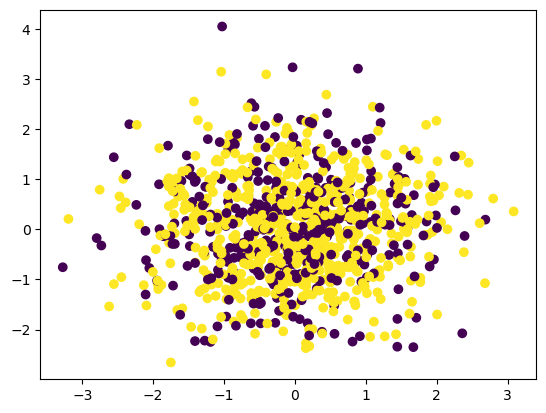

In [ ]:
import matplotlib.pyplot as plt
X = X.reshape(X.shape[0], X.shape[2])
plt.scatter(X[:, 0], X[:, 1], c=y)